Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.



Which NYC schools have the best math results?

The best math results are at least 80% of the *maximum possible score of 800* for math.
Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.
What are the top 10 performing schools based on the combined SAT scores?

Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order ("total_SAT" being the sum of math, reading, and writing scores).
Which single borough has the largest standard deviation in the combined SAT score?

Save your results as a pandas DataFrame called largest_std_dev.
The DataFrame should contain one row, with:
"borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
"num_schools" - the number of schools in the borough.
"average_SAT" - the mean of "total_SAT".
"std_SAT" - the standard deviation of "total_SAT".
Round all numeric values to two decimal places.

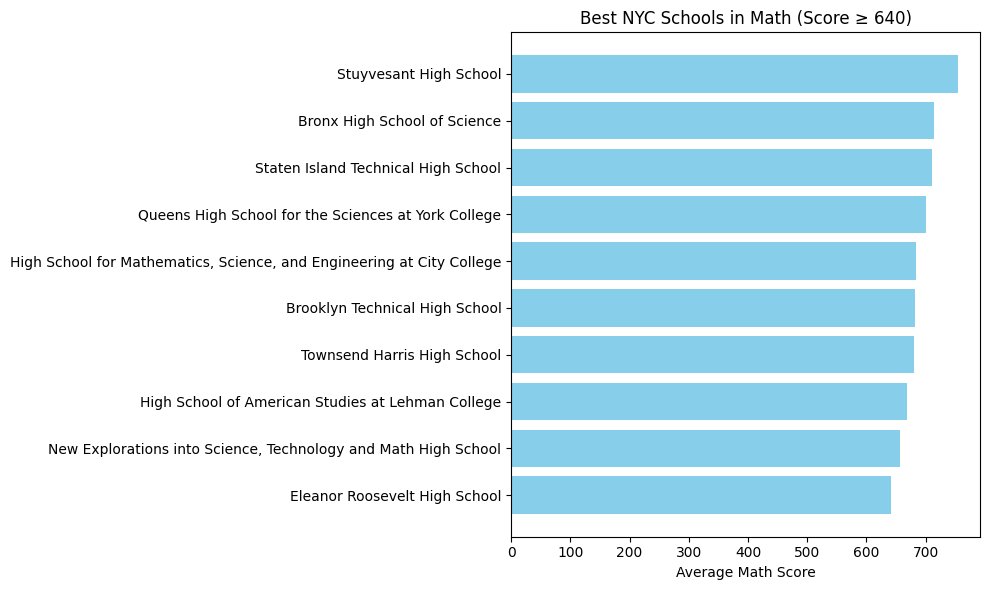

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
schools = pd.read_csv("schools.csv")

# -----------------------------
# 1. Best Math Schools
# -----------------------------
# Find schools where the average math score is 640 or higher (which is 80% of 800)
best_math_schools = schools[schools["average_math"] >= 640]

# Only keep school name and average math score
best_math_schools = best_math_schools[["school_name", "average_math"]]

# Sort by math score from highest to lowest
best_math_schools = best_math_schools.sort_values("average_math", ascending=False)

# Create a horizontal bar chart for best math scores
plt.figure(figsize=(10, 6))
plt.barh(best_math_schools["school_name"], best_math_schools["average_math"], color="skyblue")
plt.xlabel("Average Math Score")
plt.title("Best NYC Schools in Math (Score ≥ 640)")
plt.gca().invert_yaxis()  # Show highest score on top
plt.tight_layout()
plt.show()

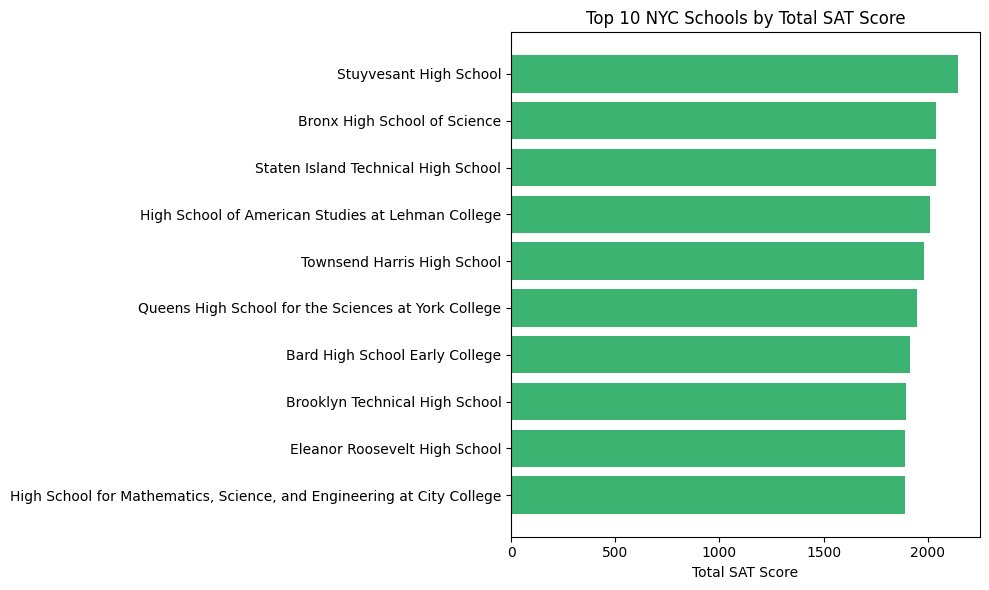

In [2]:
# -----------------------------
# 2. Top 10 Performing Schools
# -----------------------------
# Create a new column for total SAT score
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Sort by total score and keep the top 10
top_10_schools = schools.sort_values("total_SAT", ascending=False).head(10)

# Only show school name and total score
top_10_schools = top_10_schools[["school_name", "total_SAT"]]

# Create a horizontal bar chart for top 10 total scores
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools["school_name"], top_10_schools["total_SAT"], color="mediumseagreen")
plt.xlabel("Total SAT Score")
plt.title("Top 10 NYC Schools by Total SAT Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [3]:
# -----------------------------
# 3. Borough with Largest SAT Variation
# -----------------------------
# Group by borough and calculate count, average, and standard deviation of total SAT
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"])
boroughs = boroughs.round(2)

# Find the borough with the highest standard deviation
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

# Reset index to make 'borough' a column
largest_std_dev = largest_std_dev.reset_index()

# -----------------------------
# Show results
# -----------------------------
print("Best Math Schools (≥ 640):\n")
print(best_math_schools)
print("\nTop 10 Schools by Total SAT Score:\n")
print(top_10_schools)
print("\nBorough with Highest SAT Std Deviation:\n")
print(largest_std_dev)

Best Math Schools (≥ 640):

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641

Top 10 Schools by Total SAT Score:

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School 